In [6]:
import numpy as np
import joblib
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Bidirectional, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
# Load processed sequences
sequences = np.load("../data/processed/tokenized_sequences.npy")
tokenizer = joblib.load('../models/tokenizer.pkl')

In [3]:
# Split into train and target
X_train, y_train = sequences[:, :-1], sequences[:, -1]
y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(tokenizer.word_index) + 1)

In [4]:
# Build LSTM model
D = 512
V = len(tokenizer.word_index) + 1
T = X_train.shape[1]

i = Input(shape=(T,))
x = Embedding(V, D)(i)
x = Bidirectional(LSTM(250, return_sequences=True))(x)
x = Bidirectional(LSTM(250))(x)
x = Dropout(0.2)(x)
x = Dense(V, activation="softmax")(x)
lstm_model = Model(i, x)

# Compile the model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
189/189 [==============================] - 201s 1s/step - loss: 7.8495 - accuracy: 0.0498
Epoch 2/50
189/189 [==============================] - 195s 1s/step - loss: 6.2722 - accuracy: 0.0879
Epoch 3/50
189/189 [==============================] - 195s 1s/step - loss: 5.9136 - accuracy: 0.0957
Epoch 4/50
189/189 [==============================] - 186s 983ms/step - loss: 5.6621 - accuracy: 0.1007
Epoch 5/50
189/189 [==============================] - 189s 1s/step - loss: 5.4184 - accuracy: 0.1125
Epoch 6/50
189/189 [==============================] - 193s 1s/step - loss: 5.2451 - accuracy: 0.1208
Epoch 7/50
189/189 [==============================] - 197s 1s/step - loss: 5.0183 - accuracy: 0.1362
Epoch 8/50
189/189 [==============================] - 195s 1s/step - loss: 4.7799 - accuracy: 0.1497
Epoch 9/50
189/189 [==============================] - 196s 1s/step - loss: 4.4826 - accuracy: 0.1769
Epoch 10/50
189/189 [==============================] - 195s 1s/step - loss: 4.1992 - acc

In [5]:
# Save the trained LSTM model
lstm_model.save('../models/lstm_text_generation_model.keras')

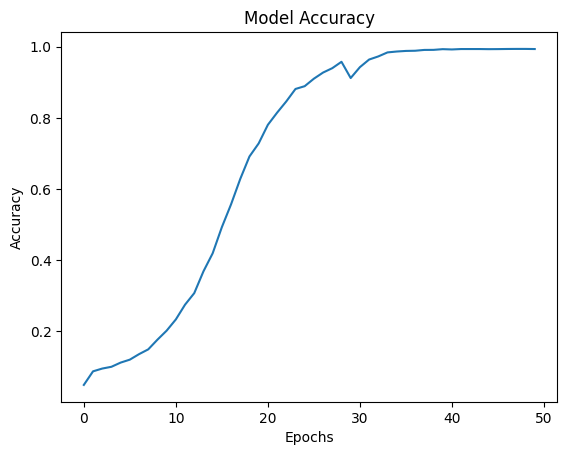

In [8]:
plt.plot(lstm_model.history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('../plots/lstm_model_training.png')
plt.show()